In [18]:
# Библиотеки
import pandas as pd
# import numpy as np

# Для графиков
import seaborn as sns # графическая
import matplotlib.pyplot as plt #  для подписи графика

from sklearn import preprocessing # для нормализации, стандартизации

import category_encoders as ce # созтание новых признаков


In [19]:
# загрука базы
heart = pd.read_csv('../../data/heart.csv')

+ age — возраст
+ sex — пол (1 - мужчина, 0 - женщина)
+ cp — тип боли в груди (4 значения)
+ trestbps — артериальное давление в покое
+ chol — холестерин сыворотки в мг/дл
+ fbs — уровень сахара в крови натощак > 120 мг/дл
+ restecg — результаты электрокардиографии в покое (значения 0,1,2)
+ thalach — достигнута максимальная частота сердечных сокращений
+ exang — стенокардия, вызванная физической нагрузкой
+ oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
+ slope — наклон пикового сегмента ST при нагрузке
+ ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
+ thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

### 8.1
Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

In [20]:
# heart.info()
heart['old'] = heart['age'].apply(lambda x: 1 if x>60 else 0)

In [21]:
heart['old'].sum()

79

### 8.2
Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя

Возраст Мужчины	Женщины
до 20	123/76	116/72
21-30	126/79	120/75
31-40	129/81	127/80
41-50	135/83	137/84
51-60	142/85	144/85
61 и >	142/80	159/85

In [22]:
list_m=[123,126,129,135,142,142]
list_f=[116,120,127,137,144,159]

def trestbps_mean_fn (temp_df):
    
    y=int((temp_df['age']-1)//10-1)
    if y>5 : y=5
    elif y<0 : y=0
    
    if temp_df['sex']>0 : return list_m[y]
    return list_f[y]

heart['trestbps_mean']=heart.apply(trestbps_mean_fn, axis=1)

heart.iloc[300]['trestbps_mean']

142.0

### 8.3
Проанализируйте датасет и выберите категориальные признаки.

In [23]:
heart.nunique().sort_values()

sex                2
fbs                2
exang              2
target             2
old                2
restecg            3
slope              3
cp                 4
thal               4
ca                 5
trestbps_mean      8
oldpeak           40
age               41
trestbps          49
thalach           91
chol             152
dtype: int64

### 8.4
Вышеперечисленные категориальные признаки уже представлены в числовом виде. Проанализируйте их и назовите те, которые нуждаются в дополнительном кодировании значений (например, OneHotEncoding)

In [24]:
heart.nunique().sort_values()

sex                2
fbs                2
exang              2
target             2
old                2
restecg            3
slope              3
cp                 4
thal               4
ca                 5
trestbps_mean      8
oldpeak           40
age               41
trestbps          49
thalach           91
chol             152
dtype: int64

### 8.5
Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

Сколько признаков получилось в датасете

In [25]:
heart_c=heart.copy()

list_type=['restecg','slope','cp','thal','ca']
for i_col in list_type:
    heart_c[i_col]=heart_c[i_col]+1
    encoder = ce.OneHotEncoder(cols=[i_col])#, use_cat_names=True) # указываем столбец для кодирования
    type_bin = encoder.fit_transform(heart_c[i_col])
    heart_c = pd.concat([heart_c, type_bin], axis=1)
    
    heart_c = heart_c.drop(labels=i_col,axis=1)

b=heart_c.shape[1]
print(b,': признаков получилось в датасете')

30 : признаков получилось в датасете


### 8.6
Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой

In [26]:
list_type=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# # зададим параметры холста, название и визуализируем кривые распределения:
# fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
# ax1.set_title('Исходные распределения')

# for i_col in list_type:
#        # kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
#        sns.kdeplot(heart_c[i_col], ax=ax1, label =i_col)

# plt.legend()
# heart_c[list_type].describe()

In [27]:
# heart_m=heart_c.copy()
# mm_scaler = preprocessing.MinMaxScaler()

# # кодируем исходный датасет
# heart_m[list_type] = mm_scaler.fit_transform(heart_m[list_type])

# # Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
# heart_m[list_type] = pd.DataFrame(heart_m[list_type], columns=list_type)

# # зададим параметры холста, название и визуализируем кривые распределения:
# fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
# ax1.set_title('После нормализации MinMaxScaler')

# for i_col in list_type:
#        # kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
#        sns.kdeplot(heart_m[i_col], ax=ax1, label =i_col)

# plt.legend()
# heart_m[list_type].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,0.081188,0.098646,-0.103173,0.149752
std,0.672748,0.876907,0.816232,0.704774,0.725672
min,-1.925926,-1.800000,-1.795276,-2.523077,-0.500000
25%,-0.555556,-0.500000,-0.456693,-0.600000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.500000,0.543307,0.400000,0.500000
max,1.629630,3.500000,5.102362,1.507692,3.375000


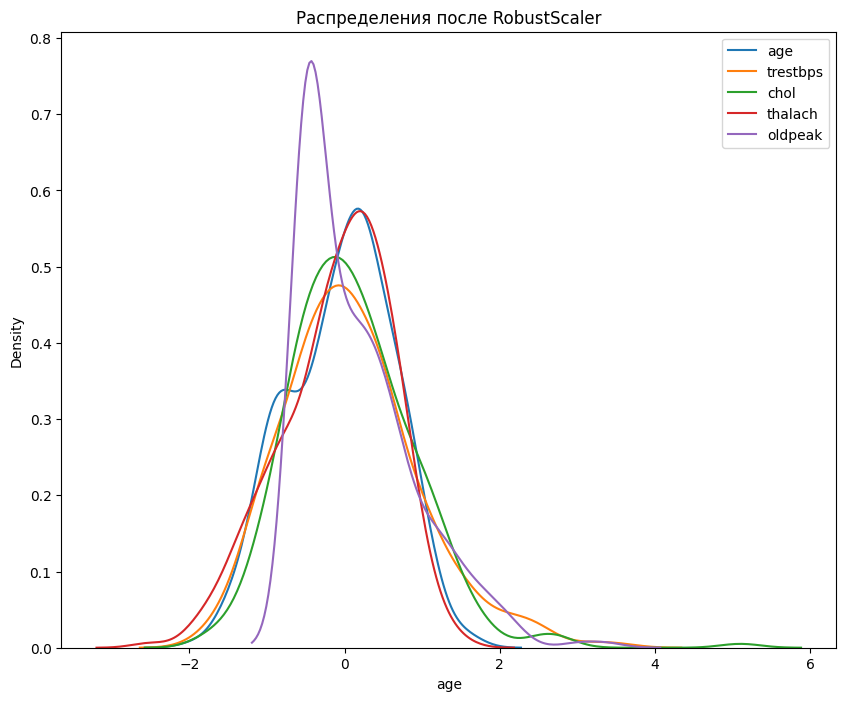

In [28]:
heart_r=heart_c.copy()

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
# кодируем исходный датасет
heart_r[list_type] = r_scaler.fit_transform(heart_r[list_type])
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_r[list_type] = pd.DataFrame(heart_r[list_type], columns=list_type)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

for i_col in list_type:
       # kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
       sns.kdeplot(heart_r[i_col], ax=ax1, label =i_col)

plt.legend()
heart_r[list_type].describe()

### 8.7
Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков

In [29]:
heart_r.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'old', 'trestbps_mean', 'restecg_1', 'restecg_2', 'restecg_3',
       'slope_1', 'slope_2', 'slope_3', 'cp_1', 'cp_2', 'cp_3', 'cp_4',
       'thal_1', 'thal_2', 'thal_3', 'thal_4', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
       'ca_5'],
      dtype='object')

<Axes: >

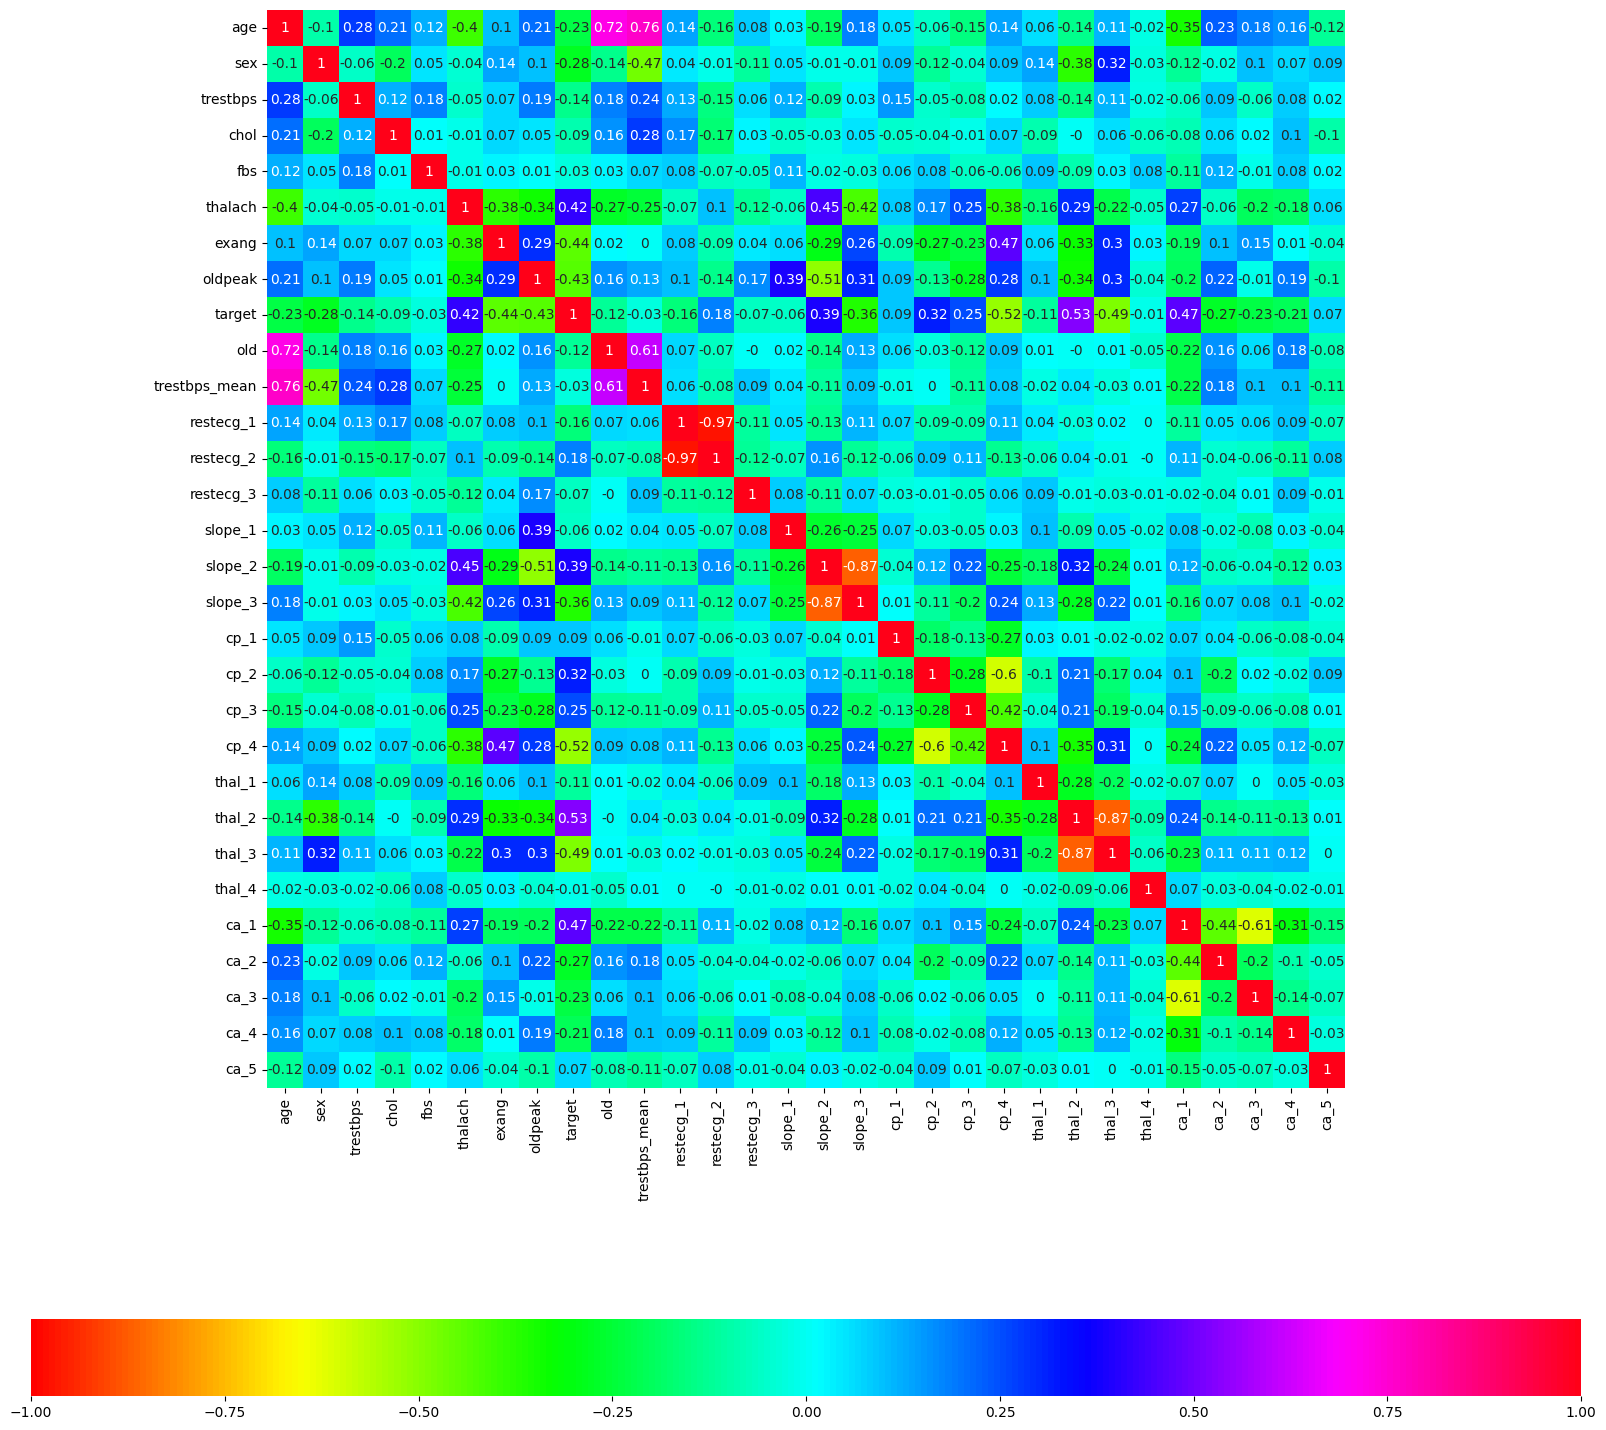

In [30]:

# list_type=['age', 'chol', 'exang']
# list_type=['target', 'trestbps_mean', 'restecg_0.0', 'restecg_1.0','restecg_2.0', 'slope_1.0']
# list_type=['cp_3.0','cp_2.0', 'cp_1.0', 'cp_0.0', 'ca_0.0', 'ca_2.0', 'ca_1.0', 'ca_3.0', 'ca_4.0']
# list_type=['age','old','trestbps_mean','slope_0.0','slope_1.0','slope_2.0','thal_1.0', 'thal_2.0', 'thal_3.0','thal_0.0']

temp=heart_r.corr().round(2)

fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 20))
sns.heatmap(temp, # df
            annot=True, # вывод надписей (подписать фон)
            vmin=-1, vmax=1, center= 0,# граници тепловой шкалы
            cmap= 'hsv',    # палитра цветов  https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
            # linewidths=3, linecolor='black', # толщина и цвет оконтовки ячеек
            cbar_kws= {'orientation': 'horizontal'},  # отображать цветовую шкалу горизонтально
            # cbar=False,  # убрать цветовую шкалу
            square=True,    # форма ячеек квадрат
            # mask=filtr_1  # фильтор выводимых значений
            )# https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii

In [31]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

get_top_abs_correlations(heart_r, 10)

restecg_1  restecg_2        0.973934
thal_2     thal_3           0.873032
slope_2    slope_3          0.870365
age        trestbps_mean    0.763055
           old              0.718028
old        trestbps_mean    0.611538
ca_1       ca_3             0.611058
cp_2       cp_4             0.599986
target     thal_2           0.527334
           cp_4             0.516015
dtype: float64